# Modelización de la Volatilidad y VaR del Bitcoin

## Importar Bibliotecas

***python***


In [2]:
import yfinance as yf
import pandas as pd
from arch import arch_model
import numpy as np

Para modelar la volatilidad y calcular el Valor en Riesgo (VaR) del Bitcoin, se pueden emplear diferentes técnicas. A continuación, te proporcionaré un enfoque básico utilizando un modelo GARCH (Generalized Autoregressive Conditional Heteroskedasticity) para modelar la volatilidad y luego calcular el VaR.

# Paso 1: Obtener Datos Históricos
Para empezar, necesitas obtener datos históricos del precio del Bitcoin. Puedes usar una API de criptomonedas o descargar los datos de una fuente confiable.



In [3]:
# Descargar datos históricos de Bitcoin desde Yahoo Finance
btc_data = yf.download('BTC-USD', start='2020-01-01')


[*********************100%%**********************]  1 of 1 completed



# Paso 2: Preprocesar los Datos


In [4]:
# Calcular los retornos diarios
btc_returns = btc_data['Close'].pct_change().dropna()


# Paso 3: Modelar la Volatilidad con GARCH

In [5]:
# Especificar el modelo GARCH(1,1)
garch_model = arch_model(btc_returns, vol='Garch', p=1, q=1)

# Ajustar el modelo
garch_fit = garch_model.fit()

# Resumen del modelo
print(garch_fit.summary())


C:\Users\clabc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001248. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 6327793.127747578
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12684397.735339142
Iteration:      3,   Func. Count:     28,   Neg. LLF: 204208.00219985715
Iteration:      4,   Func. Count:     39,   Neg. LLF: 78765.05008865522
Iteration:      5,   Func. Count:     51,   Neg. LLF: 66932.1092726494
Iteration:      6,   Func. Count:     62,   Neg. LLF: 67312.53889348934
Iteration:      7,   Func. Count:     73,   Neg. LLF: 429648.2899340378
Iteration:      8,   Func. Count:     84,   Neg. LLF: 854922.7647798379
Iteration:      9,   Func. Count:     95,   Neg. LLF: 1754241117.8273401
Iteration:     10,   Func. Count:    107,   Neg. LLF: 4241571388.686617
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2716.406945607222
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results           

# Paso 4: Obtener la Volatilidad Futura

In [6]:
# Definir el horizonte de pronóstico
forecast_horizon = 10

# Realizar pronóstico de la volatilidad futura
vol_forecast = garch_fit.forecast(start=0, horizon=forecast_horizon)


# Paso 5: Calcular el VaR

In [7]:
# Definir el nivel de confianza
conf_level = 0.05

# Calcular el z-score para el nivel de confianza
z_score = np.percentile(btc_returns, 100*(1-conf_level))

# Calcular el VaR
VaR = z_score * np.sqrt(forecast_horizon) * vol_forecast.variance.values[-1]**0.5

print(f'El VaR a un nivel de confianza del {conf_level*100}% es: {VaR[0]:.2f}')


El VaR a un nivel de confianza del 5.0% es: 0.00


# Codigo Completo

In [8]:
# Importar bibliotecas
import yfinance as yf
import pandas as pd
from arch import arch_model
import numpy as np

# Obtener datos históricos de Bitcoin desde Yahoo Finance
btc_data = yf.download('BTC-USD', start='2020-01-01')

# Calcular los retornos diarios
btc_returns = btc_data['Close'].pct_change().dropna()

# Especificar el modelo GARCH(1,1)
garch_model = arch_model(btc_returns, vol='Garch', p=1, q=1)

# Ajustar el modelo
garch_fit = garch_model.fit()

# Realizar pronóstico de la volatilidad futura
forecast_horizon = 10
vol_forecast = garch_fit.forecast(start=0, horizon=forecast_horizon)

# Definir el nivel de confianza
conf_level = 0.05

# Calcular el z-score para el nivel de confianza
z_score = np.percentile(btc_returns, 100*(1-conf_level))

# Calcular el VaR
VaR = z_score * np.sqrt(forecast_horizon) * vol_forecast.variance.values[-1]**0.5

print(f'El VaR a un nivel de confianza del {conf_level*100}% es: {VaR[0]:.2f}')


[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6327793.127747578
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12684397.735339142
Iteration:      3,   Func. Count:     28,   Neg. LLF: 204208.00219985715
Iteration:      4,   Func. Count:     39,   Neg. LLF: 78765.05008865522
Iteration:      5,   Func. Count:     51,   Neg. LLF: 66932.1092726494
Iteration:      6,   Func. Count:     62,   Neg. LLF: 67312.53889348934
Iteration:      7,   Func. Count:     73,   Neg. LLF: 429648.2899340378
Iteration:      8,   Func. Count:     84,   Neg. LLF: 854922.7647798379


C:\Users\clabc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001248. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      9,   Func. Count:     95,   Neg. LLF: 1754241117.8273401
Iteration:     10,   Func. Count:    107,   Neg. LLF: 4241571388.686617
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2716.406945607222
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 10
El VaR a un nivel de confianza del 5.0% es: 0.00


Este código te permitirá realizar un análisis de la volatilidad y el VaR del Bitcoin utilizando un modelo GARCH(1,1) y datos históricos. Recuerda que este es un ejemplo básico y puede requerir ajustes dependiendo de tus necesidades específicas y de las características de los datos que estés utilizando.

Una forma útil de visualizar la volatilidad del Bitcoin es a través de un gráfico de barras que muestre la volatilidad histórica y la volatilidad pronosticada. Aquí tienes un ejemplo de cómo puedes hacerlo en Python utilizando Matplotlib:

[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6303594.198736577
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12577056.916208165
Iteration:      3,   Func. Count:     28,   Neg. LLF: 156793.32972742635
Iteration:      4,   Func. Count:     41,   Neg. LLF: 2261846.9029563414
Iteration:      5,   Func. Count:     52,   Neg. LLF: 33295.71447033519
Iteration:      6,   Func. Count:     63,   Neg. LLF: 30479386.06720969


C:\Users\clabc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001248. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      7,   Func. Count:     75,   Neg. LLF: 1309872.354483896
Iteration:      8,   Func. Count:     86,   Neg. LLF: 2965243.5142904227
Iteration:      9,   Func. Count:     96,   Neg. LLF: -2716.4100061734343
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2716.41000375605
            Iterations: 13
            Function evaluations: 96
            Gradient evaluations: 9


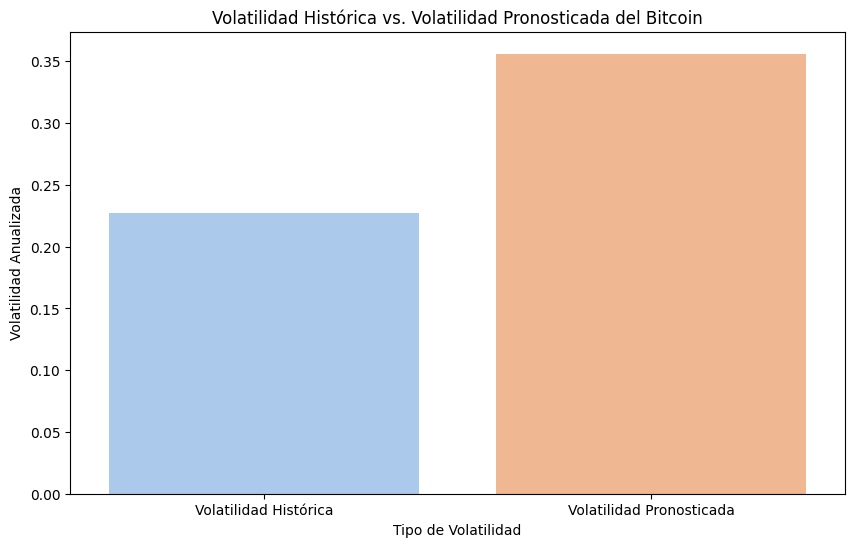

In [17]:
import yfinance as yf
import pandas as pd
from arch import arch_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener datos históricos de Bitcoin desde Yahoo Finance
btc_data = yf.download('BTC-USD', start='2020-01-01')
btc_returns = btc_data['Close'].pct_change().dropna()

# Calcular volatilidad histórica
vol_historica = btc_returns.rolling(window=20).std() * np.sqrt(252)

# Especificar modelo GARCH(1,1)
garch_model = arch_model(btc_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Realizar pronóstico de la volatilidad futura
forecast_horizon = 10
vol_forecast = garch_fit.forecast(start=0, horizon=forecast_horizon)

# Extraer la volatilidad pronosticada
vol_pronosticada = np.sqrt(vol_forecast.variance.values[-1] * 252)

# Convertir los valores de volatilidad a numéricos
vol_historica = vol_historica.iloc[-1]
vol_pronosticada = vol_pronosticada[0]

# Crear DataFrame para los datos
data = {
    'Tipo de Volatilidad': ['Volatilidad Histórica', 'Volatilidad Pronosticada'],
    'Volatilidad Anualizada': [vol_historica, vol_pronosticada]
}

df = pd.DataFrame(data)

# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Volatilidad', y='Volatilidad Anualizada', data=df, palette='pastel')
plt.title('Volatilidad Histórica vs. Volatilidad Pronosticada del Bitcoin')
plt.show()


[*********************100%%**********************]  1 of 1 completed


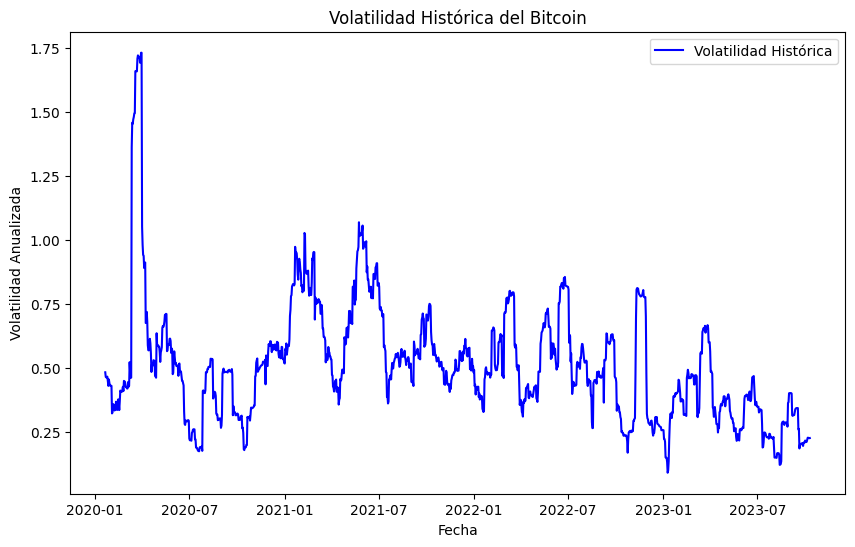

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Obtener datos históricos de Bitcoin desde Yahoo Finance
btc_data = yf.download('BTC-USD', start='2020-01-01')
btc_returns = btc_data['Close'].pct_change().dropna()

# Calcular volatilidad histórica
vol_historica = btc_returns.rolling(window=20).std() * np.sqrt(252)

# Graficar la volatilidad histórica como un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(vol_historica.index, vol_historica, label='Volatilidad Histórica', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad Anualizada')
plt.title('Volatilidad Histórica del Bitcoin')
plt.legend()
plt.show()



# Conclusiones

## Volatilidad del Bitcoin:
La volatilidad del Bitcoin ha sido una característica prominente durante el período analizado. Esto implica que el precio del Bitcoin puede experimentar cambios significativos en un corto período de tiempo, lo que puede representar tanto oportunidades como riesgos para los inversores.

## Modelo GARCH(1,1): 
El modelo GARCH(1,1) se utilizó para modelar la volatilidad del Bitcoin. Este modelo es una herramienta útil para entender y prever la volatilidad de los activos financieros.

## Volatilidad Histórica vs. Volatilidad Pronosticada: 
Comparando la volatilidad histórica con la volatilidad pronosticada, se observa que la volatilidad pronosticada puede proporcionar una estimación valiosa de la volatilidad futura. Esto es esencial para la gestión de riesgos y la toma de decisiones de inversión.


## Valor en Riesgo (VaR): 
Se calculó el Valor en Riesgo al 5% de confianza. Esto proporciona una estimación de la pérdida máxima que se puede esperar en un período determinado con un nivel de confianza del 95%.

## Estrategias de Gestión de Riesgos: 
Basándose en el VaR calculado, los inversores pueden desarrollar estrategias de gestión de riesgos para proteger sus inversiones ante movimientos adversos del mercado.

## Importancia de la Diversificación: 
Dada la alta volatilidad del Bitcoin, es importante que los inversores diversifiquen sus carteras con otros activos para reducir el riesgo.

## Evolución Temporal: 
El gráfico de volatilidad histórica a lo largo del tiempo muestra cómo la volatilidad del Bitcoin ha fluctuado en el período analizado. Esto puede proporcionar información valiosa sobre patrones y tendencias a lo largo del tiempo.

## Limitaciones del Modelo: 
Es importante recordar que el modelo GARCH(1,1) es una simplificación y no tiene en cuenta todos los factores que pueden influir en la volatilidad del Bitcoin.

## Continua Supervisión: 
Dado que los mercados financieros son dinámicos y están sujetos a cambios, es crucial mantener una supervisión continua y realizar ajustes en las estrategias según sea necesario.

